In [19]:
import numpy as np
import pandas as pd


In [20]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
headernames = ['Roll', 'Name', 'Beng', 'Eng', 'Math', 'Science', 'PEdu', 'WEdu', 'Comp', 'section']

In [22]:
data = df=pd.read_csv("/content/drive/MyDrive/data_5.csv" , names=headernames)
data.shape
data.drop(columns=['Roll', 'Name', 'Beng', 'Eng','PEdu', 'WEdu', 'Comp' ], inplace=True)

In [24]:
data.tail()

,Math,Science,section
95,2,20,C
96,1,18,C
97,6,15,C
98,0,1,C
99,0,0,C


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

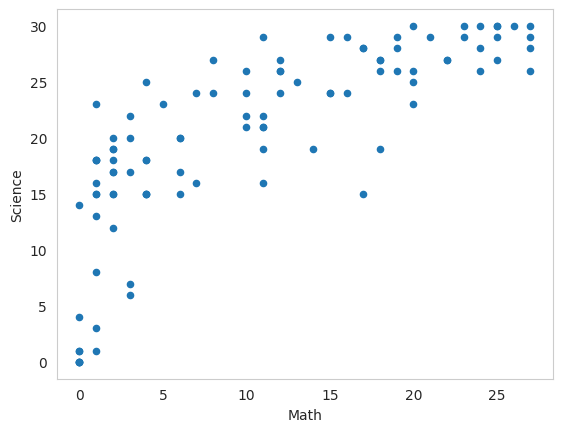

In [26]:
df.plot(kind ="scatter",
          x ='Math',
          y ='Science')
plt.grid()

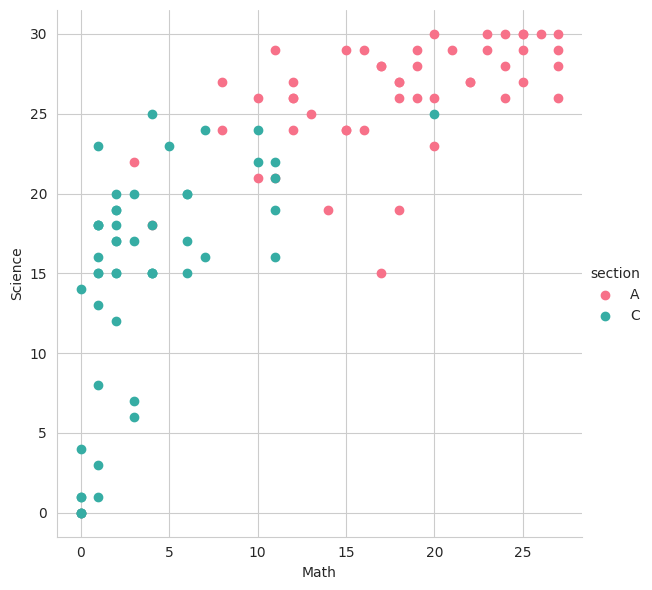

In [27]:
#df = sns.load_dataset('df')
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="section", palette="husl",height = 6).map(plt.scatter, "Math", "Science").add_legend()

In [28]:
X = data.iloc[:, :-1].values
y = data.iloc[:,2].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)



In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train);

In [32]:
y_pred = classifier.predict(X_test)
y_pred

array(['C', 'A', 'A', 'C', 'A', 'A', 'A', 'C', 'A', 'C', 'C', 'C', 'C',
       'A', 'A', 'C', 'A', 'A', 'C', 'A'], dtype='<U1')

In [37]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

,Actual,Predict
0,A,C
1,C,A
2,A,A
3,C,C
4,C,A
5,C,A
6,A,A
7,C,C
8,C,A
9,C,C


In [33]:

test_point = np.array([[25, 10, ]])
test_point_pred = classifier.predict(sc.transform(test_point))
test_point_pred
#print(classifier.predict(scaler.transform([[22, 22]])))

array(['A'], dtype='<U1')

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7, 3],
       [4, 6]])

In [35]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.65


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.plot(kind ="scatter",
          x ='F1',
          y ='F2')
plt.grid()